In [2]:
#Setup
import numpy as np
from datascience import *

# Confidence Intervals

So far, we have been mostly working with data about an entire population. But oftentimes it's difficult or impossible to collect data from entire population. For example, it's impossible to ask every single household in the united to state their annual income. That is where the power of bootstrapping and confidence intervals come in. We can use a random sample to estimate the parameters of the population.

We are going to use a dataset on baseball players. We have the entire popoluation data, but we want to practice useing confidence intervals, so ONLY use the table called SAMPLE.

In [5]:
all_players = Table.read_table("baseball.csv").drop(0)
sample = all_players.sample(350)
sample

team,leagueID,player,salary,position,gamesplayed
MON,NL,foxan01,450000,SS,34
CHN,NL,welleto0,310000,P,20
FLO,NL,foxch02,1200000,P,12
MON,NL,hernali0,6000000,P,34
CLE,AL,crispco0,319400,CF,139
NYA,AL,heredfe0,1800000,P,5
MIL,NL,helmswe0,1687500,3B,92
CHN,NL,bakopa01,865000,C,49
PIT,NL,cotahu01,303000,C,36
BOS,AL,mccarda0,500000,1B,89


### Question 1

Right now we have one random sample of 350 players. If we computed the median player salary of this sample, would that be a good estimate of the median of the entire population of baseball players? Why or why not?

*Write your answer and reasoning here*

*No, this one sample is not the best estimate, because the sample could have come out differently (due to chance), and thus the sample statistic, the median salary, could have come out differently. We need more samples, and more sample statistics, to provide a better estimate*

### Question 2

Based off your answer above, we need more samples of baseball player data. But we are out of money- we cannot go and take another random sample from the population. What other method could we use to generate more samples from the data that we have?

*Write your answer and reasoning here*

*We could use the bootstrap method, which generates more samples "resamples" from our orignal sample we collected*

### Question 3

What two conditions need to be satisfied in your resample in order for the data to be valid? If you're stuck, refer to [this](https://www.inferentialthinking.com/chapters/11/2/bootstrap.html) section of the textbook

*Write your answer and reasoning here*

*Your resample/"one bootsrap" needs to be taken 1) with replacement from your original sample and 2) of the same sample size as your orignal sample. Resampling with replacement allows us to generate differnt samples (and thus different sample statistics), and we need the same sample size so we can compare our statistics (you can't compare two medians computed from different sample sizes for example)*

### Question 4

The total bootstrap and confidence interval process is complicated, so we are going to break it down in several steps

Define the function bootstrap_median, which performs one resample of your original data. This function should take one resample of of your original data (making sure you follow the conditions outlined in Question 3!), and computes the median annual baseball player salary for the resample

In [ ]:
def bootstrap_median(original_sample):
    resample = ...
    resample_median = ...
    return ...

In [ ]:
#SOLUTION
def bootstrap_medians(original_sample):
    resample = original_sample.sample(original_sample.num_rows)
    resampled_median = np.median(resample)
    return resampled_median

### Question 5

If we wanted to construct a 95% confidence interval, what "ends"/ percentiles of the data array would we take to form our confidence interval? Hint: if we want the "middle" 95% of the data, what percent of the data is left out on the ends? Hint: refer to [textbook](https://www.inferentialthinking.com/chapters/11/3/confidence-intervals.html) if you get stuck

*Write your answer and reasoning here*

*The left end of the confidence interval is the 2.5th percentile of the data array, and the right end is the 97.5th percentile of the data array. This is the middle 95% of data, because 5% of the data is left in the ends*

### Question 6

Define a function confidence_interval, which takes in the orginal_sample table of data, and a number of replications, and returns an array, where the first item in the array is the left end of the 95% confidence interval estimating the population median salary, and the second item is the right end of the interval. Hint: use the function you defined in question 4- don't repeat code. 

In [ ]:
def confidence_interval(original_sample, replications):
    result_medians = ..
    for i in n...
        resample_median = ...
        result_medians = ...
    left_end = ....
    right_end = ...
    return ....

In [ ]:
#Solution
def confidence_interval(original_sample, replications):
    result_medians = make_array()
    for i in np.arange(replications):
        resample_median = bootstrap_median(original_sample)
        result_medians = np.append(result_medians, resample_median)
    left_end = percentile(2.5, result_medians)
    right_end = percentile(97.5, result_medians)
    return make_array(left_end, right_end)

### Question 7

Now lets compute a confidence interval! Use the function defined in question 6 to compute a 95% confidence interval for the population median annual baseball player salary, using the table sample as your original sample, and 10,000 replications

In [ ]:
c_i_95 = ...
c_i_95

In [ ]:
#Solution
c_i_95 = confidence_interval(sample, 10000)
c_i_95

### Question 8

Now lets test your conceptual understanding of the interval. Since we computed a 95% confidence interval, does that mean that 95% of baseball players have an annual salary between the left and right ends of your interval? If not, what does the 95% confidence level represent?

*Write your answer and reasoning here*

*No, 95% of players do not have annual incomes in this interval. A 95% confidence interval means that 95% of the time (ie we are 95% confident), this interval will contain the true population median annual income parameter*

# Mean

The terms "mean" and "average" are often used interchangeably. Their definition is the sum of all the elements in an array divided by the total size of the array.

Formally in mathematical notation it can be written as $$\frac{1}{n}\sum^n_{i=1}x_i$$ where $n$ is the number of elements in the array and $x_i$ is the ith element in the array.

In [11]:
some_numbers = make_array([0, 2, 3, 7, 15, 21])

In [12]:
np.mean(some_numbers)

8.0

Without using `numpy` functions `np.mean` or `np.average`, calculate the mean yourself and check that it is the same number.

In [46]:
#Solution
np.sum(some_numbers) / np.size(some_numbers)

8.0

For data consisting only of ones and zeroes, the mean will represent the proportion of elements that are one.

Now lets try it on our dataset!
Using `np.mean`, find the proportion of baseball players that are pitchers.
*(Hint: boolean values `False` and `True` can also serve as the equivalent of 0 and 1)*

In [21]:
#Solution
np.mean(all_players.column("position") == 'P')

0.47176913425345046

Take a look at the histogram for the salaries of baseball players. Do you think that the median will be higher than the mean, the mean will be higher than the median, or they will be the same? 

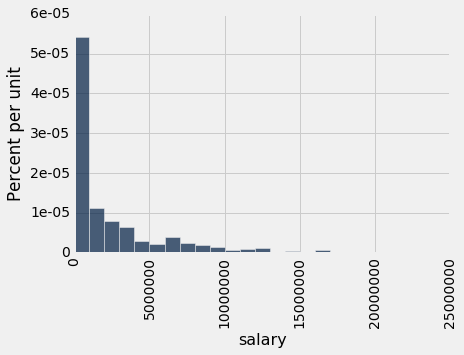

In [43]:
all_players.select("salary").hist(bins = np.arange(0, 25000000, 1000000))

*Answer*: The mean will be higher than the median because the data is skewed to the right, so players will extremely high salaries will pull the mean up.

If someone asked you about how much money most baseball players for their salaries, which would be a better statistic to use? The mean or median? Why? 

*Answer*: The median would be a better statistic to use because the mean will overrepresent players who earn extremely high salaries, suggesting that most player earn more than they actually do.

# Variance and Standard Deviation

In lecture and the textbook, we went over the steps for calculating the variance of an array of data:

1. Calculate the mean
2. Subtract the mean from all the data points to get the deviations
3. Square each deviation
4. Calculate the mean of the squares of the deviations

To put it in a nice mathematical formula:

$$\frac{1}{n}\sum^n_{i=1}(x_i - \bar{x})^2$$

where $n$ is the number of elements in the array, $x_i$ is the ith element in the array, and $\bar{x}$ is the mean of the array.

The standard deviation is just the square root of the variance:

$$\sqrt{\frac{1}{n}\sum^n_{i=1}(x_i - \bar{x})^2}$$

In [47]:
np.std(some_numbers)

7.5718777944003648

Without using `numpy` function `np.std`, calculate the standard deviation yourself and check that it is the same number. You can use `np.mean` this time!

In [55]:
#Solution
np.sqrt(np.mean((some_numbers - np.mean(some_numbers))**2))

7.5718777944003648

Standard deviation gives us a good "standard" way of measuring how far away data points are from the mean. Since every dataset is different, standard deviation "standardizes" our data so that using phrases like "one standard deviation away" are universally understood.

According to Chebychev's Bounds, the proportion of data points within $z$ standard deviations of the mean is lower bounded by $1 - \frac{1}{z^2}$. Find the proportion of players who earn within salaries two standard deviations.

In [68]:
#Solution
sd = np.std(all_players.column("salary"))
m = np.mean(all_players.column("salary"))

np.mean(np.logical_and(all_players.column("salary") - m < 2 * sd,  all_players.column("salary") - m > - 2 * sd))

0.94479297365119197

Does the proportion you calculated agree with Chebychev's Bounds?

*Answer*: Yes, 94.5% is greater than $1 - \frac{1}{2^2} = .75$